In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.manifold import trustworthiness
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, v_measure_score, fowlkes_mallows_score

In [64]:
df = pd.read_csv('quake.csv')

In [65]:
df

,Focal depth,Latitude,Longitude,Richter
0,33,-52.26,28.30,6.7
1,36,45.53,150.93,5.8
2,57,41.85,142.78,5.8
3,67,29.19,141.15,6.2
4,30,-21.66,169.81,6.0
...,...,...,...,...
2173,13,51.54,-173.11,5.8
2174,97,-10.16,161.01,5.9
2175,527,27.87,139.51,5.8
2176,51,36.43,140.98,6.0


## 1. EDA and Data Preparation, Feature Engineering

1. Conducted thorough Exploratory Data Analysis (EDA) and prepared the data meticulously. it contains: inspect the Data, Summary Statistics, Data Cleaning, Data Visualization, Handling missing values, Checking for duplicate rows, Ensuring data types are correct

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Focal depth  2178 non-null   int64  
 1   Latitude     2178 non-null   float64
 2   Longitude    2178 non-null   float64
 3   Richter      2178 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 68.2 KB


In [16]:
df.describe()

,Focal depth,Latitude,Longitude,Richter
count,2178.000000,2178.000000,2178.000000,2178.000000
mean,74.359963,7.961997,54.914835,5.977181
std,116.467797,30.545583,118.875581,0.189426
min,0.000000,-66.490000,-179.960000,5.800000
25%,21.000000,-12.432500,-67.782500,5.800000
50%,39.000000,0.210000,122.100000,5.900000
75%,68.000000,36.480000,146.860000,6.100000
max,656.000000,78.150000,180.000000,6.900000


In [17]:
df.isna().sum()

Focal depth    0
Latitude       0
Longitude      0
Richter        0
dtype: int64

In [18]:
df.duplicated().sum()

1

In [19]:
df = df.drop_duplicates()

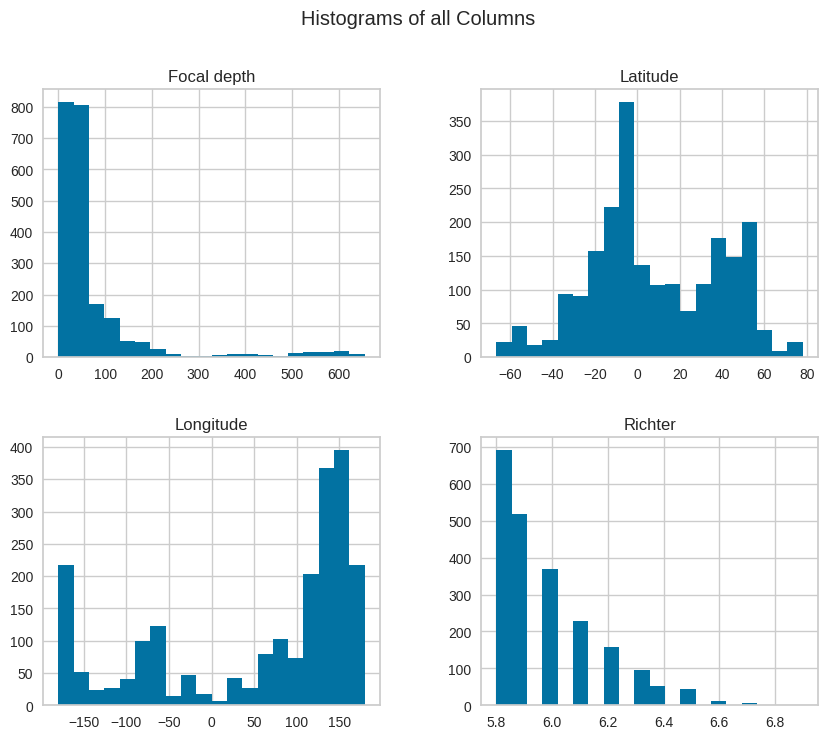

In [20]:
df.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of all Columns')
plt.show()

In [40]:
spearman_corr = df.corr(method='spearman')

In [41]:
spearman_corr

,Focal depth,Richter,Coordinate,clusters_15
Focal depth,1.000000,-0.003669,-0.227608,0.202019
Richter,-0.003669,1.000000,0.054672,0.237556
Coordinate,-0.227608,0.054672,1.000000,-0.259042
clusters_15,0.202019,0.237556,-0.259042,1.000000


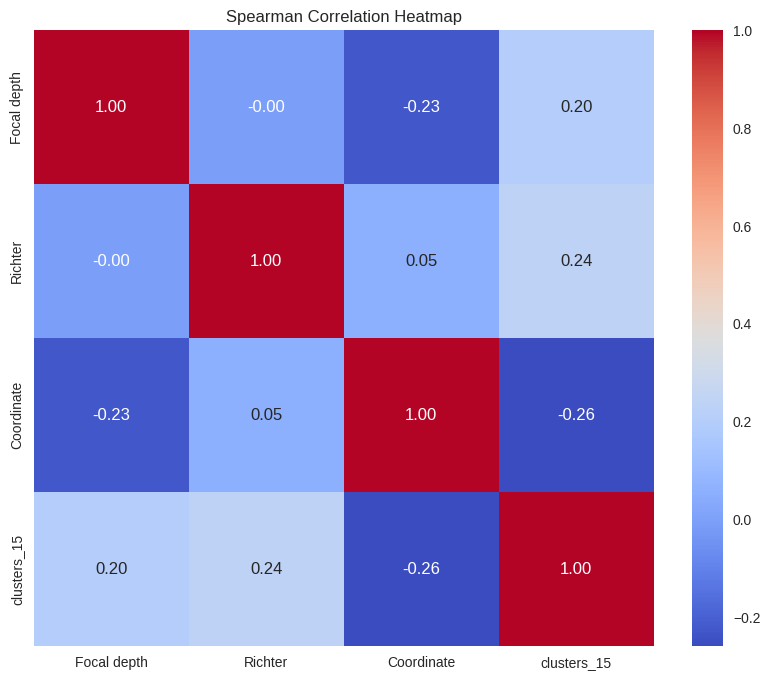

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Heatmap')
plt.show()

no correlation between features

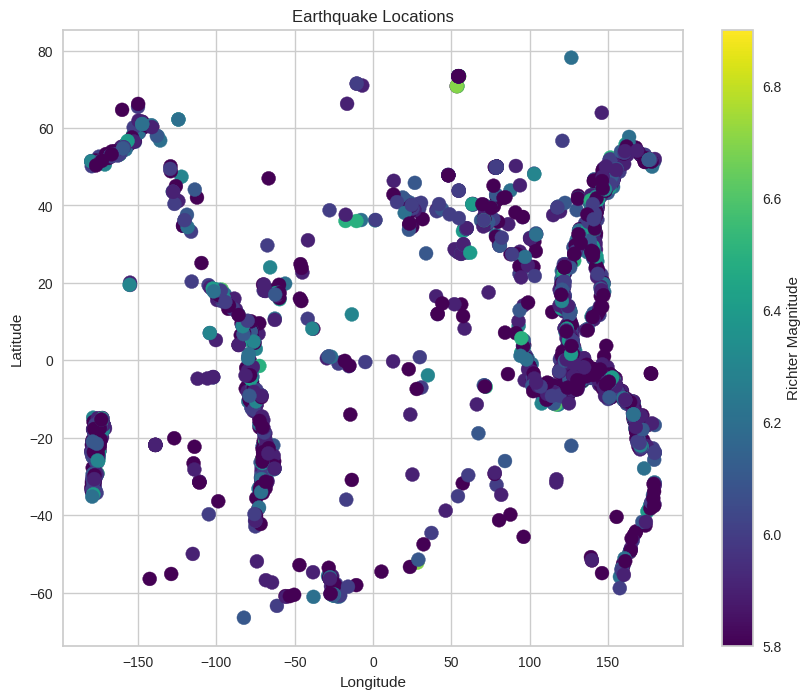

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Richter'], cmap='viridis', s=100)
plt.colorbar(label='Richter Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations')
plt.show()

in Exploratory Data Analysis, we see that there is no missing values in dataset, there was only one duplicate and i removed it. i check outliers and lastly i make a visualisations about features. due to that all columns are numerical make histograms and for two features make scatterplot. if we make a scatterplot for longitude and latitude, their cross point would be the cordinates. the graph shows like little map and we see that most points is between 100-150 in longitude and -20 - 50 in latitude. i check this cordinates on the global map and this is Asia area.

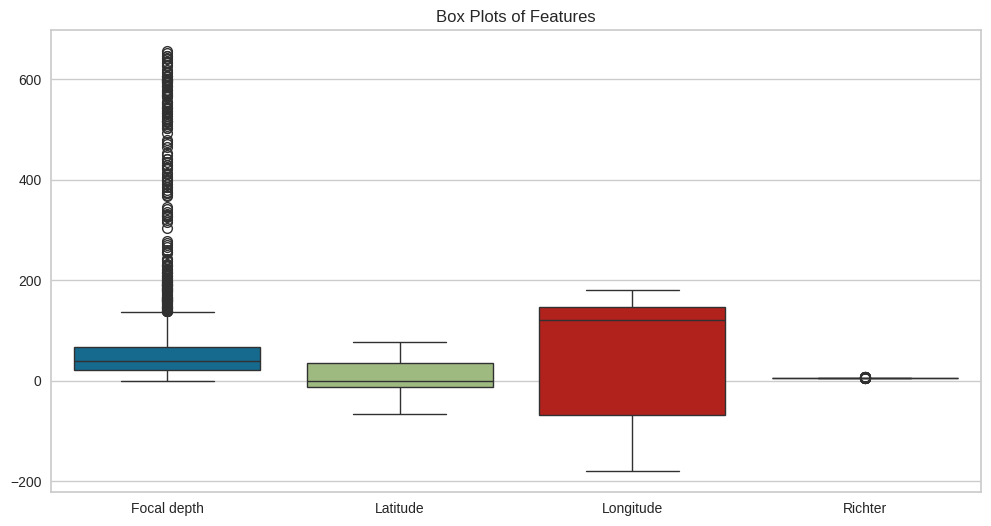

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Features')
plt.show()

In [23]:
for column in df.columns:
    print(f"{column}: Min = {df[column].min()}, Max = {df[column].max()}")

Focal depth: Min = 0, Max = 656
Latitude: Min = -66.49, Max = 78.15
Longitude: Min = -179.96, Max = 180.0
Richter: Min = 5.8, Max = 6.9


In [24]:
scaler = RobustScaler()
df['Focal depth'] = scaler.fit_transform(df[['Focal depth']])
print("\nData after scaling with RobustScaler:\n", df)


Data after scaling with RobustScaler:
       Focal depth  Latitude  Longitude  Richter
0       -0.127660    -52.26      28.30      6.7
1       -0.063830     45.53     150.93      5.8
2        0.382979     41.85     142.78      5.8
3        0.595745     29.19     141.15      6.2
4       -0.191489    -21.66     169.81      6.0
...           ...       ...        ...      ...
2173    -0.553191     51.54    -173.11      5.8
2174     1.234043    -10.16     161.01      5.9
2175    10.382979     27.87     139.51      5.8
2176     0.255319     36.43     140.98      6.0
2177     0.042553     24.02     122.23      5.8

[2177 rows x 4 columns]


<ipython-input-24-fd6e972612de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Focal depth'] = scaler.fit_transform(df[['Focal depth']])


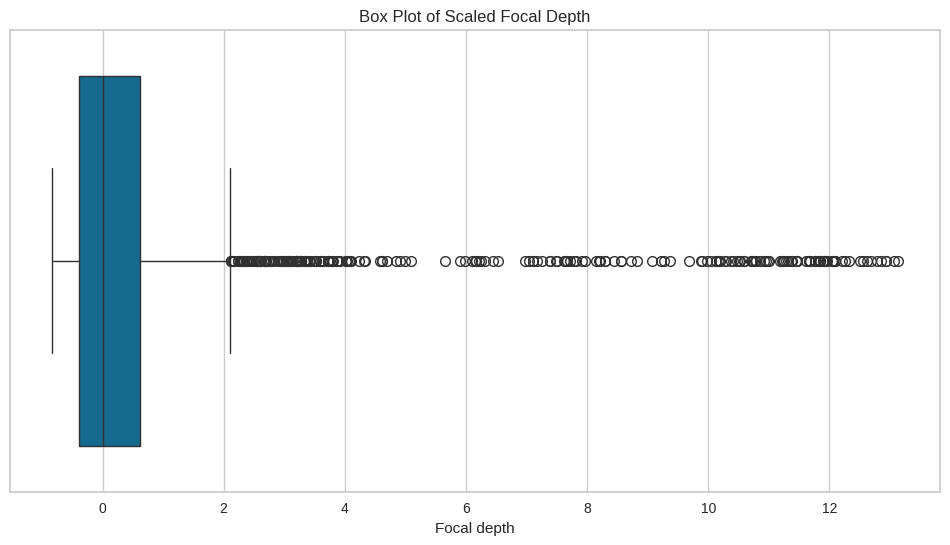

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Focal depth'])
plt.title('Box Plot of Scaled Focal Depth')
plt.show()

In [26]:
df

,Focal depth,Latitude,Longitude,Richter
0,-0.127660,-52.26,28.30,6.7
1,-0.063830,45.53,150.93,5.8
2,0.382979,41.85,142.78,5.8
3,0.595745,29.19,141.15,6.2
4,-0.191489,-21.66,169.81,6.0
...,...,...,...,...
2173,-0.553191,51.54,-173.11,5.8
2174,1.234043,-10.16,161.01,5.9
2175,10.382979,27.87,139.51,5.8
2176,0.255319,36.43,140.98,6.0


In [66]:
df['Coordinates'] = df.apply(lambda row: (row['Latitude'], row['Longitude']), axis=1)

In [28]:
df

,Focal depth,Latitude,Longitude,Richter,Coordinates
0,-0.127660,-52.26,28.30,6.7,"(-52.26, 28.3)"
1,-0.063830,45.53,150.93,5.8,"(45.53, 150.93)"
2,0.382979,41.85,142.78,5.8,"(41.85, 142.78)"
3,0.595745,29.19,141.15,6.2,"(29.19, 141.15)"
4,-0.191489,-21.66,169.81,6.0,"(-21.66, 169.81)"
...,...,...,...,...,...
2173,-0.553191,51.54,-173.11,5.8,"(51.54, -173.11)"
2174,1.234043,-10.16,161.01,5.9,"(-10.16, 161.01)"
2175,10.382979,27.87,139.51,5.8,"(27.87, 139.51)"
2176,0.255319,36.43,140.98,6.0,"(36.43, 140.98)"


In [67]:
def combine_coordinates(lat, lon):
    return lat * 1000 + lon

df['Coordinate'] = df.apply(lambda row: combine_coordinates(row['Latitude'], row['Longitude']), axis=1)

In [68]:
df

,Focal depth,Latitude,Longitude,Richter,Coordinates,Coordinate
0,33,-52.26,28.30,6.7,"(-52.26, 28.3)",-52231.70
1,36,45.53,150.93,5.8,"(45.53, 150.93)",45680.93
2,57,41.85,142.78,5.8,"(41.85, 142.78)",41992.78
3,67,29.19,141.15,6.2,"(29.19, 141.15)",29331.15
4,30,-21.66,169.81,6.0,"(-21.66, 169.81)",-21490.19
...,...,...,...,...,...,...
2173,13,51.54,-173.11,5.8,"(51.54, -173.11)",51366.89
2174,97,-10.16,161.01,5.9,"(-10.16, 161.01)",-9998.99
2175,527,27.87,139.51,5.8,"(27.87, 139.51)",28009.51
2176,51,36.43,140.98,6.0,"(36.43, 140.98)",36570.98


Correct Feature Engineering and Scaling/Normalization. i check outliers with box plot and shows that there is lot of in Focal depth column. so decide to make scaling on this column. because of the fact that it contains lots of outliers i decide not to delete them and use Robust scaler, because it is not sensitive toward outliers. RobustScaler uses the median and the interquartile range (IQR) for scaling. The median and IQR are robust statistics, meaning they are not influenced by outliers.

for Feature engineering, i create a new columns with Latitude	 and Longitude points and make a cordinate points, like world's map


## 2. K-Means Algorithm

Built a K-Means model with 15 clusters

In [69]:
df = df[['Focal depth', 'Richter', 'Coordinate']]

In [70]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

In [71]:
X = df.copy()

In [72]:
kmeans_main = KMeans(n_clusters = 15, n_init=10, random_state=31)
kmeans_main.fit(X)

KMeans(n_clusters=15, n_init=10, random_state=31)

In [73]:
df['clusters_15'] = kmeans_main.predict(X)

In [74]:
clusters = df['clusters_15'].values
clusters

array([ 4,  2,  2, ...,  3, 10, 14], dtype=int32)

In [75]:
x = X['Focal depth']
y = X['Richter']
z = X['Coordinate']

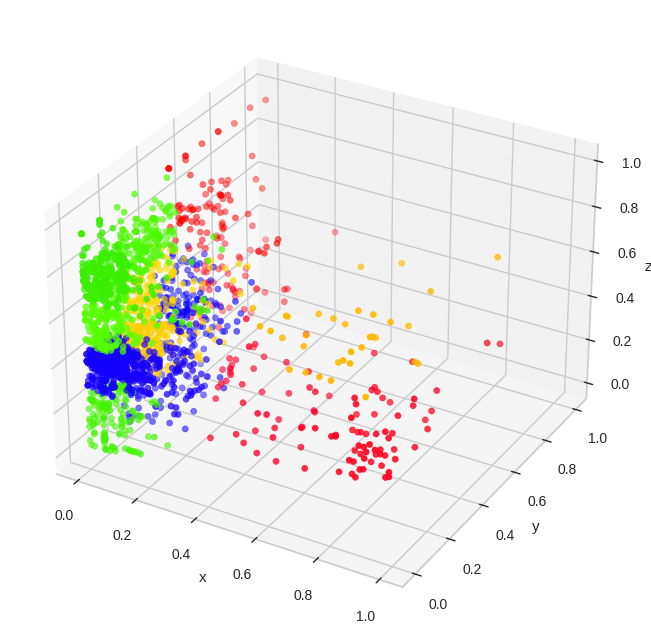

In [76]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c = clusters, cmap='prism')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


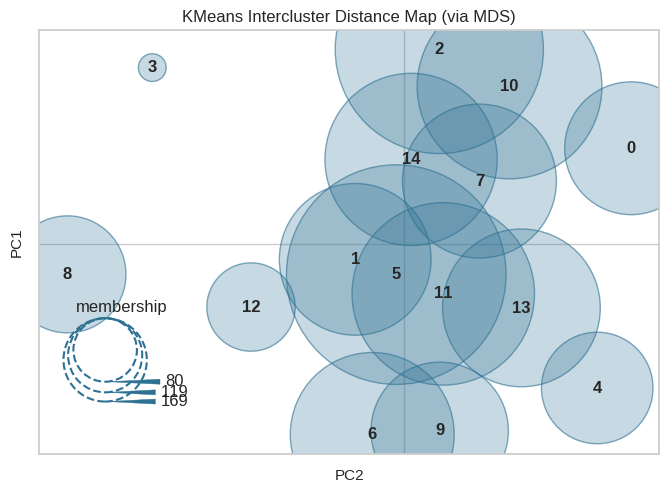

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [77]:
icd_visualizer = InterclusterDistance(kmeans_main)
icd_visualizer.fit(X)
icd_visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


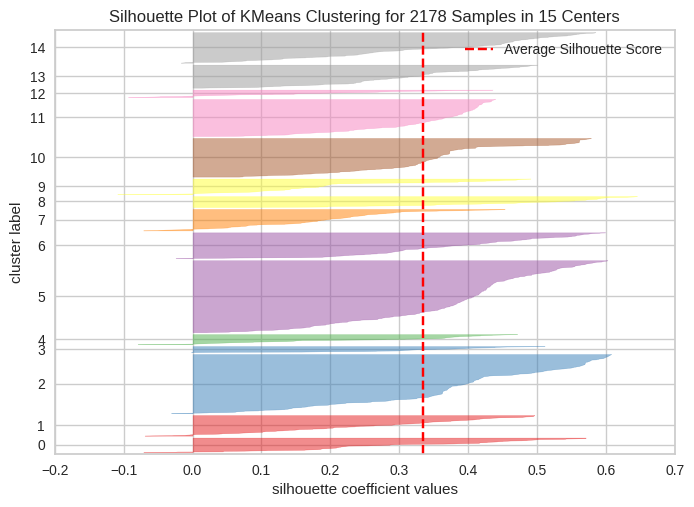

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2178 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
silhouette_visualizer = SilhouetteVisualizer(kmeans_main)
silhouette_visualizer.fit(X)
silhouette_visualizer.show()

In [79]:
kmeans = KMeans(n_clusters = 15, n_init=50, random_state=31)

def elbowplot(df, elbowmetric, model):
  print('Elbow Score Plot (' + str(elbowmetric) + " metric): ")
  vis = KElbowVisualizer(
      model,
      k=(2,21),
      metric = elbowmetric,
      locate_elbow = True,
      timings=True
  )
  vis.fit(X)
  print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
        " | elbow score:", f'{vis.elbow_score_:,.3f}')
  vis.show()

Elbow Score Plot (distortion metric): 
elbow value = optimal k: 6  | elbow score: 51.917


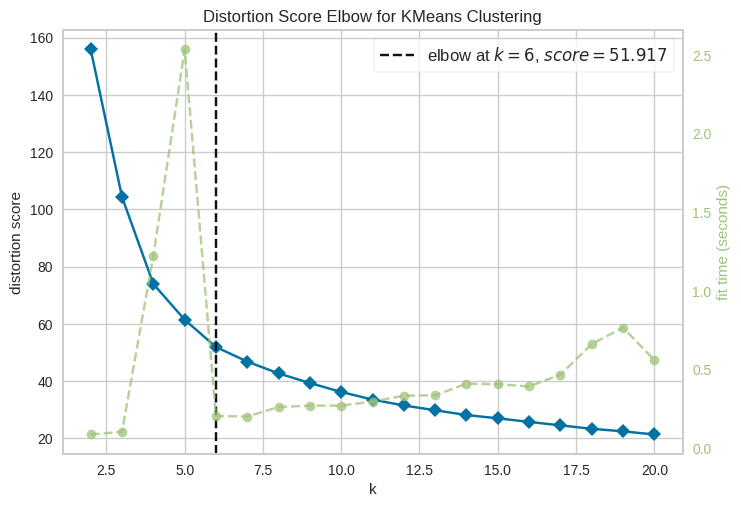

In [80]:
elbowplot(X, "distortion", kmeans)

In [51]:
sil_score = silhouette_score(X, clusters)

In [52]:
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.32825513924425725


the elbow method shows that optimal cluster number is 6, silhouette score is 0.3, which is near to the 0, indicates that the samples are on or very close to the decision boundary between two neighboring clusters. so make a changes and see the result about clusters = 6

In [125]:
kmeans_main = KMeans(n_clusters = 4, n_init=10, random_state=31)
kmeans_main.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=31)

In [126]:
df['clusters_4'] = kmeans_main.predict(X)

In [127]:
clusters = df['clusters_4'].values
clusters

array([2, 3, 3, ..., 1, 3, 3], dtype=int32)

In [128]:
x = X['Focal depth']
y = X['Richter']
z = X['Coordinate']

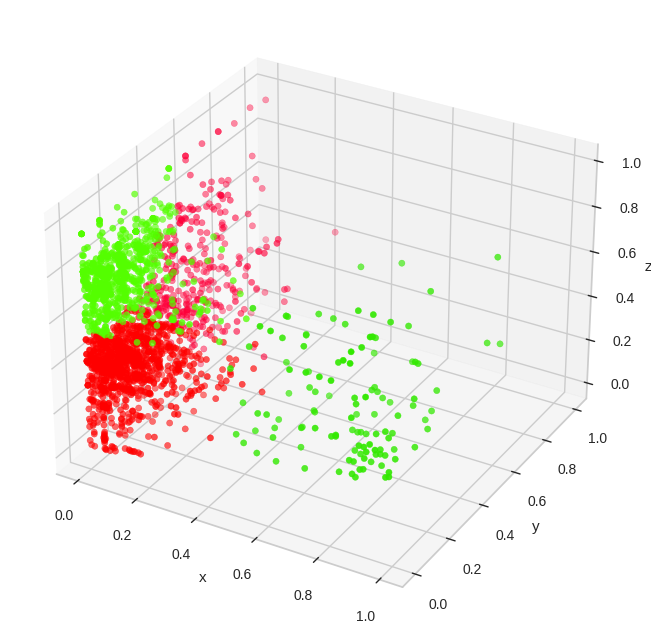

In [129]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c = clusters, cmap='prism')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


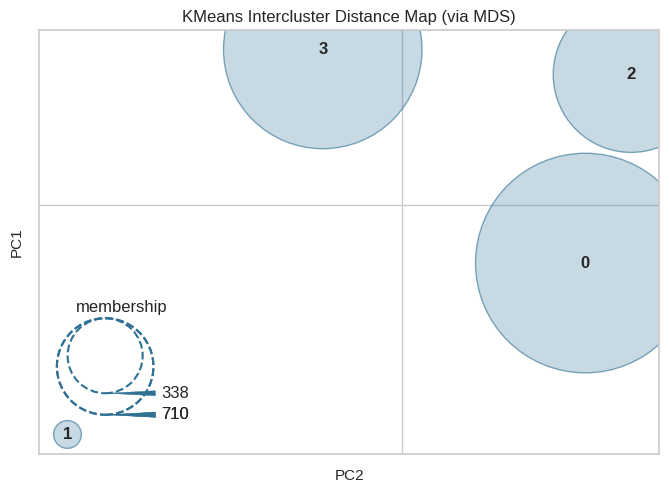

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [130]:
icd_visualizer = InterclusterDistance(kmeans_main)
icd_visualizer.fit(X)
icd_visualizer.show()

In [131]:
sil_score = silhouette_score(X, clusters)

In [132]:
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.431400166619058


Elbow Score Plot (calinski_harabasz metric): 
elbow value = optimal k: 4  | elbow score: 1,530.241


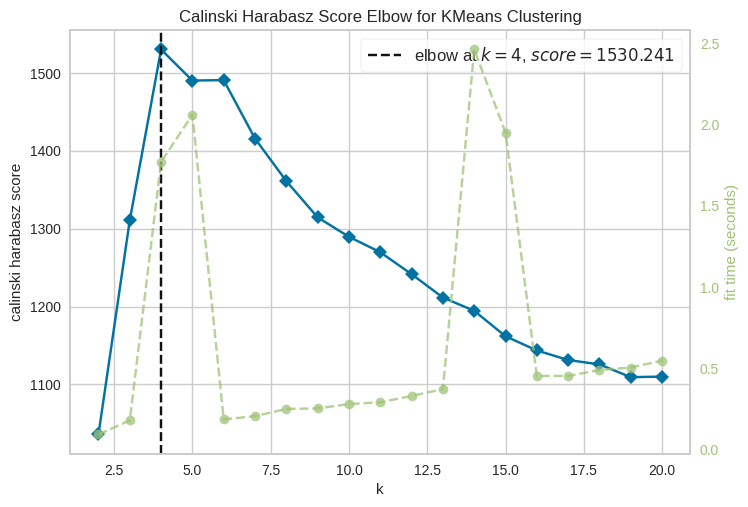

In [113]:
elbowplot(X, "calinski_harabasz", kmeans)

In [114]:
kmeans = KMeans(n_clusters = 6, n_init=50, random_state=31)

def elbowplot(df, elbowmetric, model):
  print('Elbow Score Plot (' + str(elbowmetric) + " metric): ")
  vis = KElbowVisualizer(
      model,
      k=(2,21),
      metric = elbowmetric,
      locate_elbow = True,
      timings=True
  )
  vis.fit(X)
  print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
        " | elbow score:", f'{vis.elbow_score_:,.3f}')
  vis.show()

Elbow Score Plot (distortion metric): 
elbow value = optimal k: 6  | elbow score: 51.917


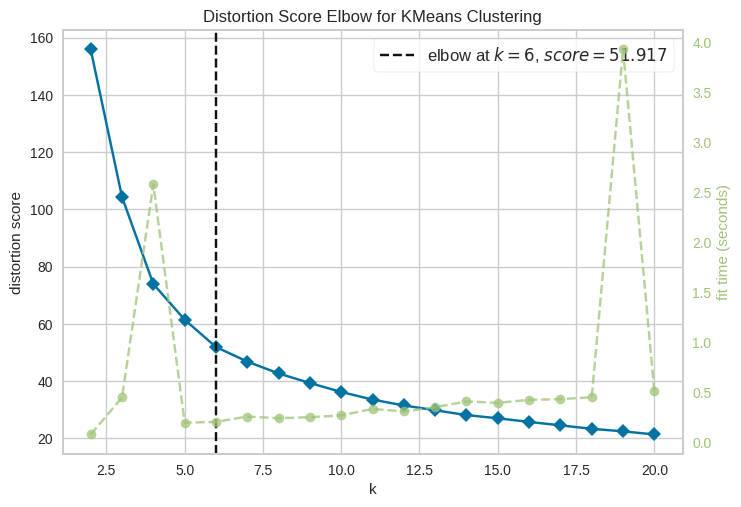

In [115]:
elbowplot(X, "distortion", kmeans)

after checking, both method it gives different number of clusters, 6 and 4. after tried both of them and 4 cluster is more optimal because silhouette score is higher than with 6 clusters. i get 10, 8, 6, 2 clusters, it really do not give me a different result but number 4 gives me little bit higher. score = 0.431400166619058

use other clustering algotihms

DENSITY-BASED CLUSTERING

In [134]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px

In [136]:
dbscan = DBSCAN(eps=1.0, min_samples=2)
dbscan_labels = dbscan.fit_predict(df)

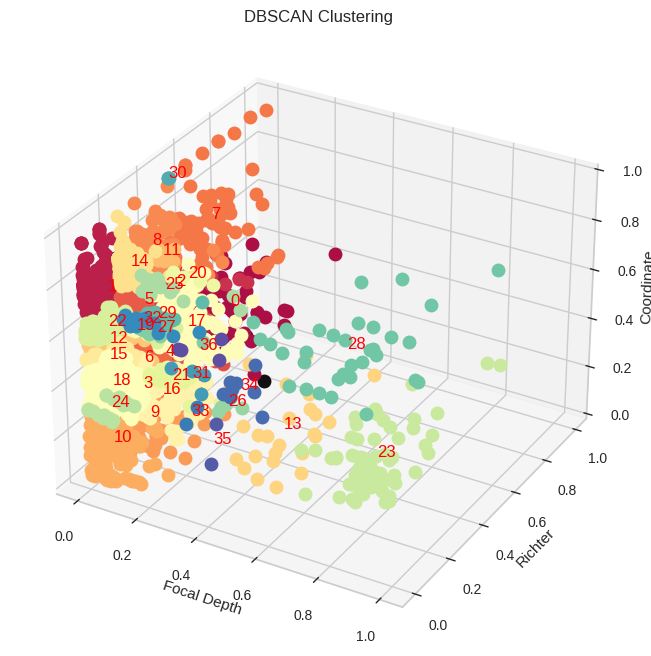

In [139]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Black color for noise
    class_member_mask = (dbscan_labels == k)
    xyz = df[class_member_mask]
    ax.plot(xyz['Focal depth'], xyz['Richter'], xyz['Coordinate'], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    if k != -1:
        ax.text(np.mean(xyz['Focal depth']), np.mean(xyz['Richter']), np.mean(xyz['Coordinate']), str(k), fontsize=12, color='red')

ax.set_xlabel('Focal Depth')
ax.set_ylabel('Richter')
ax.set_zlabel('Coordinate')
ax.set_title('DBSCAN Clustering')
plt.show()

In [141]:
from sklearn.metrics import silhouette_score

best_eps = 0.5
best_min_samples = 2
best_score = -1

for eps in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]:
    for min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        if len(set(labels)) > 1:  # More than one cluster
            score = silhouette_score(df, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")

Best eps: 0.3, Best min_samples: 2, Best silhouette score: 0.9335838772024888


AGGLOMERATIVE CLUSTERING

In [142]:
data_array = df.to_numpy()

In [143]:
best_n_clusters = 4
best_linkage = 'ward'
best_score = -1

for n_clusters in range(2, 21):
    for linkage in ['ward', 'complete', 'average', 'single']:
        ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = ac.fit_predict(data_array)

        # Check the number of unique labels
        if len(set(labels)) > 1:
            score = silhouette_score(data_array, labels)
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_linkage = linkage

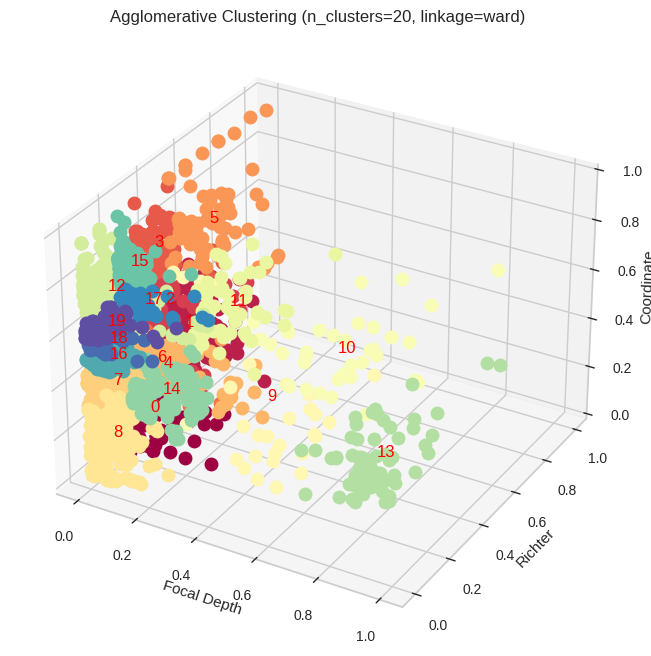

In [145]:
ac = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
ac_labels = ac.fit_predict(df)

df['Cluster'] = ac_labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(ac_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (ac_labels == k)
    xyz = df[class_member_mask]
    ax.plot(xyz['Focal depth'], xyz['Richter'], xyz['Coordinate'], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    if k != -1:
        ax.text(np.mean(xyz['Focal depth']), np.mean(xyz['Richter']), np.mean(xyz['Coordinate']), str(k), fontsize=12, color='red')

ax.set_xlabel('Focal Depth')
ax.set_ylabel('Richter')
ax.set_zlabel('Coordinate')
ax.set_title(f'Agglomerative Clustering (n_clusters={best_n_clusters}, linkage={best_linkage})')
plt.show()

In [146]:
print(f"Best number of clusters: {best_n_clusters}, Best linkage: {best_linkage}, Best silhouette score: {best_score}")

Best number of clusters: 20, Best linkage: ward, Best silhouette score: 0.8753318416460316


result shows that density-based algorithm is more optimal in this situation, because Best silhouette score: 0.9335838772024888 (near to 1)

Evaluated the quality of the obtained clusters using internal and external metrics.

In [147]:
# DBSCAN Clustering
dbscan_model = DBSCAN(eps=1.0, min_samples=2)
dbscan_labels = dbscan_model.fit_predict(df)
dbscan_silhouette = silhouette_score(df, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(df, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(df, dbscan_labels)

In [150]:
# K-Means Clustering
kmeans_model = KMeans(n_clusters=4)
kmeans_labels = kmeans_model.fit_predict(df)
kmeans_silhouette = silhouette_score(df, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(df, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(df, kmeans_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [151]:
print("DBSCAN:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Davies-Bouldin Index: {dbscan_davies_bouldin}")
print(f"Calinski-Harabasz Index: {dbscan_calinski_harabasz}")

print("\nK-Means:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"Calinski-Harabasz Index: {kmeans_calinski_harabasz}")


DBSCAN:
Silhouette Score: 0.9430097941296011
Davies-Bouldin Index: 0.7096996171420287
Calinski-Harabasz Index: 103802.80398317048

K-Means:
Silhouette Score: 0.5171540766998042
Davies-Bouldin Index: 0.7864537250296196
Calinski-Harabasz Index: 2376.693052439651


In [154]:
# Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_model.fit_predict(df)
agg_silhouette = silhouette_score(df, agg_labels)
agg_davies_bouldin = davies_bouldin_score(df, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(df, agg_labels)

In [155]:
print("\nAgglomerative:")
print(f"Silhouette Score: {agg_silhouette}")
print(f"Davies-Bouldin Index: {agg_davies_bouldin}")
print(f"Calinski-Harabasz Index: {agg_calinski_harabasz}")


Agglomerative:
Silhouette Score: 0.5171457226964731
Davies-Bouldin Index: 0.7867728760842058
Calinski-Harabasz Index: 2376.692634484194


Silhouette Score: Higher values are better
Davies-Bouldin Index: Lower values indicate better clustering
Calinski-Harabasz Index: Higher values are bett
according to the result:
DBSCAN has a significantly higher Silhouette Score (approximatelly 0.943) compared to K-Means (app. 0.517) and Agglomerative clustering (0.517), indicating that DBSCAN forms clusters with better cohesion and separation.
DBSCAN has the lowest DBI (0.710), which indicates better cluster separation compared to K-Means (0.786) and Agglomerative clustering (0.787).
DBSCAN has a much higher CHI (103802.80) compared to K-Means (2376.69) and Agglomerative clustering (2376.69), suggesting that DBSCAN has the best cluster dispersion and separation.
as decided cluster number is choosen as 4 so conclusion is that:
DBSCAN outperforms K-Means and Agglomerative clustering on all three metrics (Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index). This suggests that DBSCAN provides better-defined clusters with good separation and density.